In [1]:
path= '\\Users\\stell\\OneDrive\\Dokumente\\fp55\\Daten\\'
path2='\\Users\\stell\\OneDrive\\Dokumente\\fp55\\Ergebnisse\\'

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
data=np.genfromtxt(path+'tlwia2018-07-23_f0002-Replicate.txt', skip_header=1, skip_footer=7) #Daten importieren

In [3]:
#Massen alle in g
Gefäß=432.30

m=[936.64, 927.43, 917.13, 904.23, 893.90, 883.90, 872.20, 861.55]

merror=0.05 #Fehler gilt für alle Messungen

In [4]:
#Berechne verbliebenden Wasseranteil
waterfrac=[] #leeres Array
waterfracerror=[]

for i in range(1, len(m)):
    w=(m[i]-Gefäß)/(m[0]-Gefäß)
    werror=np.sqrt((merror/(m[0]-Gefäß)**2+((m[i]-Gefäß)*merror/(m[0]-Gefäß)**2)**2+((m[0]-m[i])*merror/(m[0]-Gefäß)**2)**2))
    waterfrac=np.append(waterfrac, w)
    waterfracerror=np.append(waterfracerror, werror)

In [5]:
name=data[:,0]

D=data[:,1] #Deuterium
Derror=data[:,2]
np.nan_to_num(Derror, copy=False) #wegen zu wenig Daten kann für einen Wert kein Fehler berechnet werden, dieser wird durch 0 ersetz

O18=data[:,3]
O18error=data[:,4]
np.nan_to_num(O18error, copy=False)

O17=data[:,5]
O17error=data[:,6]
np.nan_to_num(O17error, copy=False)

array([0.096, 0.055, 0.033, 0.109, 0.   , 0.053, 0.024])

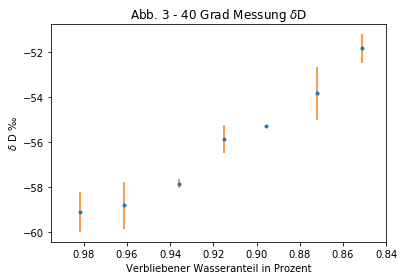

In [6]:
plt.plot(waterfrac, D, '.')
plt.errorbar(waterfrac, D, xerr=waterfracerror, yerr=Derror, linestyle='None')

plt.xlim(0.995, 0.84) #Von größerer zu kleiner x-Achse

plt.ylabel('$\delta$ D ‰')
plt.xlabel('Verbliebener Wasseranteil in Prozent')
plt.title('Abb. 3 - 40 Grad Messung $\delta$D')
plt.savefig(path2+'Abb3.png')

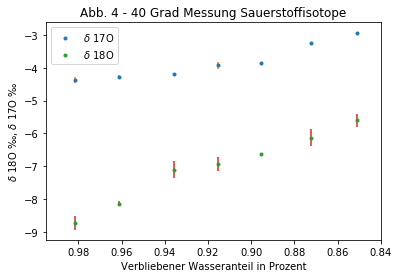

In [7]:
plt.plot(waterfrac, O17, '.',label='$\delta$ 17O')
plt.errorbar(waterfrac, O17, xerr=waterfracerror, yerr=O17error, linestyle='None')

plt.plot(waterfrac, O18, '.', label='$\delta$ 18O')
plt.errorbar(waterfrac, O18, xerr=waterfracerror, yerr=O18error, linestyle='None')
plt.xlim(0.995, 0.84) #Von größerer zu kleiner x-Achse

plt.ylabel('$\delta$ 18O ‰, $\delta$ 17O ‰')
plt.xlabel('Verbliebener Wasseranteil in Prozent')
plt.legend()
plt.title('Abb. 4 - 40 Grad Messung Sauerstoffisotope')
plt.savefig(path2+'Abb4.png')

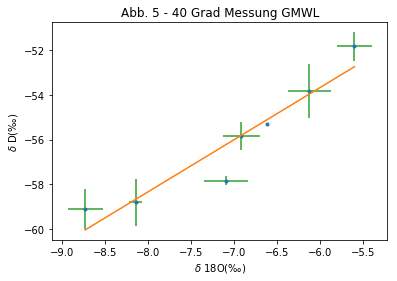

In [8]:
#GMWL

#Fitgerade
def line(x, a, b): 
    return a * x + b
popt, pcov = curve_fit(line, O18, D)

#Plot erstellen

plt.plot(O18, D, '.')
plt.plot(O18,line(O18, *popt))
plt.errorbar (O18, D, xerr=O18error, yerr=Derror, linestyle='None')

plt.ylabel('$\delta$ D(‰)')
plt.xlabel('$\delta$ 18O(‰)')
plt.title('Abb. 5 - 40 Grad Messung GMWL')
plt.savefig(path2+'Abb5.png')

In [9]:
#Fitparameter
print("a =", popt[0], "+/-", pcov[0,0]**0.5) #in Promill
print("b =", popt[1], "+/-", pcov[1,1]**0.5) #in Promill

a = 2.333243171420248 +/- 0.3498341828464366
b = -39.65839632762045 +/- 2.4870272253028882


delta0 = -0.060646879283332934 +/- 0.00039573955750948865
epsilon = -0.05465410984225159 +/- 0.0041732251222424575
alpha = 0.9999453458901577 +/- 4.173225122242458e-06


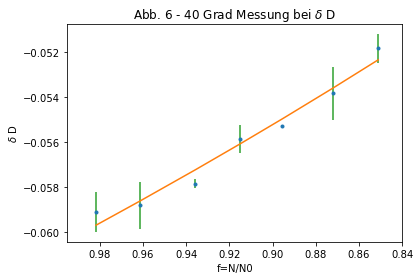

In [17]:
#Fraktionierungs Faktor Alpha - Wasserstoff
f=waterfrac
ferror=waterfracerror

def delta(f, delta0, epsilon):
    return (1+delta0)*((f)**(epsilon))-1

popt, pcov = curve_fit(delta, f, D/1000)

plt.plot(f, D/1000, '.')
plt.plot(f,delta(f, *popt))
plt.errorbar (f, D/1000, xerr=ferror, yerr=Derror/1000, linestyle='None')
plt.xlim(0.995, 0.84) #Von größerer zu kleiner x-Achse

plt.ylabel('$\delta$ D')
plt.xlabel('f=N/N0')
plt.title('Abb. 6 - 40 Grad Messung bei $\delta$ D ')
plt.savefig(path2+'Abb6.png')

#Fitparameter
print("delta0 =", popt[0], "+/-", pcov[0,0]**0.5) #in Promill
print("epsilon =", popt[1], "+/-", pcov[1,1]**0.5) 

alpha=popt[1]/1000+1
alphaerror=(pcov[1,1]**0.5)/1000
print("alpha =", alpha, "+/-", alphaerror)

delta0 = -0.004723073741061662 +/- 0.00014027357242802558
epsilon = -0.010069618436985455 +/- 0.001398615130396565
alpha = 0.999989930381563 +/- 1.398615130396565e-06


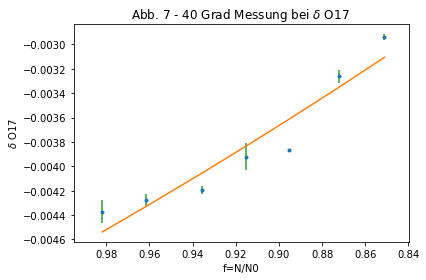

In [19]:
#Fraktionierungs Faktor Alpha - Sauerstoff17
f=waterfrac
ferror=waterfracerror

def delta(f, delta0, epsilon):
    return ((1+delta0)*((f)**(epsilon)))-1

popt, pcov = curve_fit(delta, f, O17/1000)

plt.plot(f, O17/1000, '.')
plt.plot(f,delta(f, *popt))
plt.errorbar (f, O17/1000, xerr=ferror, yerr=O17error/1000, linestyle='None')
plt.xlim(0.995, 0.84) #Von größerer zu kleiner x-Achse

plt.ylabel('$\delta$ O17')
plt.xlabel('f=N/N0')
plt.title('Abb. 7 - 40 Grad Messung bei $\delta$ O17 ')
plt.savefig(path2+'Abb7.png')

#Fitparameter
print("delta0 =", popt[0], "+/-", pcov[0,0]**0.5) #in Promill
print("epsilon =", popt[1], "+/-", pcov[1,1]**0.5)

alpha=popt[1]/1000+1
alphaerror=(pcov[1,1]**0.5)/1000
print("alpha =", alpha, "+/-", alphaerror)

delta0 = -0.008888868640671429 +/- 0.00017957800863122478
epsilon = -0.021033749407264827 +/- 0.0017972370817960137
alpha = 0.9999789662505927 +/- 1.7972370817960137e-06


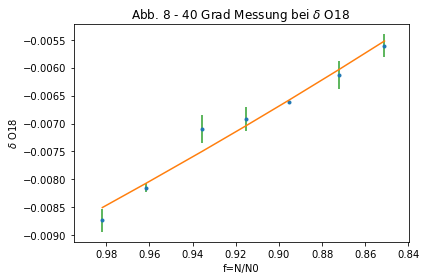

In [20]:
#Fraktionierungs Faktor Alpha - Sauerstoff18
f=waterfrac
ferror=waterfracerror

def delta(f, delta0, epsilon):
    return (1+delta0)*((f)**(epsilon))-1

popt, pcov = curve_fit(delta, f, O18/1000)

plt.plot(f, O18/1000, '.')
plt.plot(f,delta(f, *popt))
plt.errorbar (f, O18/1000, xerr=ferror, yerr=O18error/1000, linestyle='None')
plt.xlim(0.995, 0.84) #Von größerer zu kleiner x-Achse

plt.ylabel('$\delta$ O18')
plt.xlabel('f=N/N0')
plt.title('Abb. 8 - 40 Grad Messung bei $\delta$ O18 ')
plt.savefig(path2+'Abb8.png')

#Fitparameter
print("delta0 =", popt[0], "+/-", pcov[0,0]**0.5) #in Promill
print("epsilon =", popt[1], "+/-", pcov[1,1]**0.5) 

alpha=popt[1]/1000+1
alphaerror=(pcov[1,1]**0.5)/1000
print("alpha =", alpha, "+/-", alphaerror)